In [1]:
import pandas, os, numpy as np, collections
import config
np.random.seed(config.seed)
import os, sklearn, pandas, numpy as np
from sklearn import svm
import skimage
from skimage import io, filters
from utils import utils # custom functions, in local environment
import matplotlib.pyplot as plt
from keras.callbacks import TensorBoard
%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
## NN libs
import keras
from sklearn.decomposition import PCA
from keras.utils import to_categorical
from keras.layers import Dense, Activation
from keras.optimizers import SGD, Adam
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, Conv3D, MaxPool2D, Dropout, Flatten

In [3]:
import data, config, tfidf, models
from utils import io

 Dataset :: namedtuple(
  'info': pandas.df
  'labels': pandas.df('filename.txt': 'genre')
  'genres': ['genre'] # unique genres
  'label_dataset': SubDataset
  'sentiment_dataset': SubDataset
  'book_sentiment_words_list': ['filename']

 SubDataset :: namedtuple(
   'dict_index_to_label' = dict to convert label_index -> label_name
   'dict_label_to_index'= dict to convert label_name -> label_index
   'word_list' = raw word list

NP - - - [0.07630829 0.77991879]


In [4]:
# info = pandas.read_csv(config.dataset_dir + 'final_data.csv')
dataset = data.init_dataset()
dataset.info.keys()

>>>>>>>>>>.
['defeated', 'angry', 'jollities', 'loyalist', 'regretfully', 'respectable', 'radiancy', 'devastator', 'sappy', 'pardons', 'failures', 'compassionate', 'dissatisfactions', 'benevolently', 'gentler', 'true', 'growth', 'agreeably', 'manipulated', 'inspiration']


Index(['title', 'filename', 'title.1', 'author', 'release year', 'genre',
       'pos score', 'neg score', 'neu score', 'comp score', 'amt pos',
       'amt neg'],
      dtype='object')

In [5]:
len(dataset.book_sentiment_words_list)

744

In [6]:
amt = 600
train = dataset.book_sentiment_words_list[:amt]
test = dataset.book_sentiment_words_list[amt:]

In [7]:
x_train, y_train = data.extract_all(dataset, train)
x_test, y_test = data.extract_all(dataset, test)

In [8]:
y_train

['christian',
 'adventur',
 'western',
 'travel',
 'comic',
 'knstlerroman',
 'adventur',
 'children',
 'satir',
 'polit',
 'children',
 'children',
 'young adult',
 'science fiction',
 'satir',
 'detect',
 'dystopian',
 'horror',
 'children',
 'adventur',
 'unknown',
 'frame stori',
 'histor',
 'science',
 'cryptozoolog',
 'romance',
 'histor',
 'histor',
 'histor',
 'romantic',
 'romantic',
 'adventur',
 'nonsens poetri',
 'nonfict',
 'adventur',
 'adventur',
 'science fiction',
 'science fiction',
 'short stori',
 'lost world genr',
 'lost world genr',
 'fantasi',
 'fantasi',
 'science fiction',
 'literari realism',
 'literari realism',
 'children',
 'novel',
 'novel',
 'novel',
 'histor',
 'thriller',
 'children',
 'nonfict',
 'fantasi',
 'bildungsroman',
 'nonprofit',
 'biographi',
 'autobiographi',
 'fantasi',
 'fantasi',
 'novel',
 'novel',
 'literari realism',
 'juvenil',
 'novel of manner',
 'black comedi',
 'mysteri',
 'science fiction',
 'unknown',
 'histor',
 'romance',
 's

### Prepare the labels

Encode the labels to one-hot vectors

In [9]:
y_train, y_test = data.labels_to_vectors(dataset.label_dataset,y_train, y_test)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Convert tokenlist to vectors

### Using sentiment-wordlist

In [10]:
b = dataset.sentiment_dataset
a = 'a s d fp sks dk fsji sdf'.split(' ')
data.tokenlist_to_vector(a,b)

array([0., 0., 0., ..., 0., 0., 0.])

### Using polarization scores

In [11]:
data.polarization_scores_to_vector(dataset,'706.txt')

array([0.05957593, 0.04597156, 0.66307096, 0.02651661])

### Using NER scores

In [12]:
# ...

## Train a model
Although most of the input consists of classes, many classes will be correlated (e.g. related genres).
Therefore a neural network is chosen to model the data

In [13]:
x_train2 = models.to_vector(x_train, dataset)
x_train2.shape

(600, 5095)

In [14]:
n_samples = len(x_train2) # = length of the list of images (matrices)
input_shape = x_train2.shape[1:] # = shape of an individual image (matrix)
output_length = (y_train[0]).shape[0] # = length of an individual label
print(n_samples, input_shape)
print('output length', output_length)

600 (5095,)
output length 113


In [34]:
# import models # src/models.py
dropout = 0.20
# model, summary = models.sequential(input_shape, output_length, dropout)
def sequential(input_shape, output_length, dropout=0.10):
    model = Sequential()
    model.add(Dense(256, activation='relu', input_shape=input_shape))
    #model.add(Dense(256, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(output_length, activation='softmax'))
    # in addition, return a function that displays information about the model
    return model, model.summary

model, summary = sequential(input_shape, output_length, dropout)

summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               1304576   
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 113)               29041     
Total params: 1,333,617
Trainable params: 1,333,617
Non-trainable params: 0
_________________________________________________________________


## Loss function
- Categorical cross-entropy loss

In [35]:
learning_rate = 0.0001
optimizer = Adam(lr=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

## Finally train the model

In [36]:
# Compute a batch size
batch_size = round(16)
# n epochs = n iterations over all the training data
epochs = 220

.

### Show logs [here](http://localhost:6006/#scalars)

When training a new model, close any _Tenserboard_ tab,

then run ` make logs ` and start training.

.

In [37]:
use_validation_split = True
use_validation_split = False

if use_validation_split:
    model.fit(x_train2, y_train, epochs=epochs, batch_size=batch_size, validation_split=1/6, callbacks=[TensorBoard(log_dir=config.tmp_model_dir)])
else:    
    model.fit(x_train2, y_train, epochs=epochs, batch_size=batch_size)

Epoch 1/220
600/600 [==============================] - 2s 3ms/step - loss: 4.6978 - acc: 0.0633
Epoch 2/220
600/600 [==============================] - 1s 2ms/step - loss: 4.6208 - acc: 0.0900
Epoch 3/220
600/600 [==============================] - 1s 2ms/step - loss: 4.5101 - acc: 0.1067
Epoch 4/220
600/600 [==============================] - 1s 2ms/step - loss: 4.3685 - acc: 0.0967
Epoch 5/220
600/600 [==============================] - 1s 2ms/step - loss: 4.2175 - acc: 0.1033
Epoch 6/220
600/600 [==============================] - 1s 2ms/step - loss: 4.0894 - acc: 0.1183
Epoch 7/220
600/600 [==============================] - 1s 2ms/step - loss: 3.9844 - acc: 0.1000
Epoch 8/220
600/600 [==============================] - 1s 2ms/step - loss: 3.9151 - acc: 0.1150
Epoch 9/220
600/600 [==============================] - 1s 2ms/step - loss: 3.8580 - acc: 0.1250
Epoch 10/220
600/600 [==============================] - 1s 2ms/step - loss: 3.8298 - acc: 0.1433
Epoch 11/220
600/600 [=================

600/600 [==============================] - 1s 2ms/step - loss: 2.2595 - acc: 0.5450
Epoch 86/220
600/600 [==============================] - 1s 2ms/step - loss: 2.2343 - acc: 0.5667
Epoch 87/220
600/600 [==============================] - 1s 2ms/step - loss: 2.2120 - acc: 0.5583
Epoch 88/220
600/600 [==============================] - 1s 2ms/step - loss: 2.1935 - acc: 0.5750
Epoch 89/220
600/600 [==============================] - 1s 2ms/step - loss: 2.1793 - acc: 0.5850
Epoch 90/220
600/600 [==============================] - 1s 2ms/step - loss: 2.1579 - acc: 0.5817
Epoch 91/220
600/600 [==============================] - 1s 2ms/step - loss: 2.1466 - acc: 0.5800
Epoch 92/220
600/600 [==============================] - 1s 2ms/step - loss: 2.1145 - acc: 0.5817
Epoch 93/220
600/600 [==============================] - 1s 2ms/step - loss: 2.1002 - acc: 0.5817
Epoch 94/220
600/600 [==============================] - 1s 2ms/step - loss: 2.0939 - acc: 0.5933
Epoch 95/220
600/600 [=====================

600/600 [==============================] - 1s 2ms/step - loss: 1.0349 - acc: 0.8350
Epoch 169/220
600/600 [==============================] - 1s 2ms/step - loss: 1.0409 - acc: 0.8417
Epoch 170/220
600/600 [==============================] - 1s 2ms/step - loss: 1.0168 - acc: 0.8467
Epoch 171/220
600/600 [==============================] - 1s 2ms/step - loss: 1.0199 - acc: 0.8467
Epoch 172/220
600/600 [==============================] - 1s 2ms/step - loss: 1.0084 - acc: 0.8383
Epoch 173/220
600/600 [==============================] - 1s 2ms/step - loss: 0.9871 - acc: 0.8550
Epoch 174/220
600/600 [==============================] - 1s 2ms/step - loss: 0.9859 - acc: 0.8517
Epoch 175/220
600/600 [==============================] - 1s 2ms/step - loss: 0.9609 - acc: 0.8683
Epoch 176/220
600/600 [==============================] - 1s 2ms/step - loss: 0.9696 - acc: 0.8550
Epoch 177/220
600/600 [==============================] - 1s 2ms/step - loss: 0.9571 - acc: 0.8567
Epoch 178/220
600/600 [===========

## (optional) Train an SVM
This SVM requires y :: [ int ]

In [38]:
n = 400
n_classes = 20

In [39]:
# convert y to [int]
y_train3 = [y.argmax() + 1 for y in y_train[:n]]
# exclude classes
# y_train3 = [y.argmax() for y in y_train[:n] if (y.argmax() < n_classes and not y.argmax() in [8,2])]
n = len(y_train3)
print(n)
print(y_train3[:20])

400
[17, 1, 110, 102, 19, 52, 1, 15, 83, 75, 15, 15, 113, 85, 83, 25, 30, 48, 15, 1]


In [40]:
# # SVM
# clf = svm.SVC()
# clf.fit(x_train2[:n], y_train3[:n])
# print('done')
# result = clf.predict(x_train2[:n])

In [41]:
# x = np.array([[1,2],[3,4],[1,1],[4,3]])
# y = np.array([3,2,1,2])
# clf = svm.SVC()
# clf.fit(x,y)
# xx = np.array([[2,1]])
# clf.predict(xx)

## Save model to disk

In [42]:
def save_model(model, model_name, weight_name):
    # serialize model to JSON
    model_json = model.to_json()
    with open(config.dataset_dir + 'models/' + model_name + '.json', "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights(config.dataset_dir + 'models/' + weight_name + '.h5', "w")
    print("Saved model to disk")
    

In [43]:
save_model(model, "default_model","default_model_w")

Saved model to disk


# Test

In [51]:
result_known_data = model.predict(x_train2)
result_known_data == y_train

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [52]:
i = result_known_data[0].argmax()
result_known_data[0][i]

0.5535803

In [46]:
# data.y_to_label_dict(dataset,result_known_data[0])

In [53]:
all_, best = data.decode_y(dataset, result_known_data[0])
best

['christian']

In [48]:
correct, incorrect,_,_ = data.analyse_ml_result(dataset, y_train, result_known_data)
print(correct/float(incorrect + correct), correct, incorrect, correct+incorrect)

0.9433333333333334 566 34 600


In [49]:
r = model.predict(models.to_vector(x_test, dataset))
correct, incorrect,_,_ = data.analyse_ml_result(dataset, y_test, r, 1)
print(correct/float(incorrect + correct), correct, incorrect, correct+incorrect)

0.3611111111111111 52 92 144


In [50]:
r = model.predict(models.to_vector(x_test, dataset))
correct, incorrect, c, ic = data.analyse_ml_result(dataset, y_test, r, 5)
print(correct/float(incorrect + correct), correct, incorrect, correct+incorrect)

0.5486111111111112 79 65 144


In [32]:
len(c)

80

In [33]:
len(set(c))

7

In [71]:
counter = collections.Counter(c)
counter

Counter({'adventur': 6,
         'children': 16,
         'detect': 2,
         'epistolari': 2,
         'fantasi': 17,
         'fiction': 2,
         'gothic': 2,
         'histor': 13,
         'horror': 3,
         'nonfict': 2,
         'novel': 10,
         'novella': 1,
         'science fiction': 4,
         'short stori': 1,
         'unknown': 12})

In [72]:
len(counter.keys())

15

In [73]:
def sf(string):
    if string == 'Science Fiction':
        string = 'SF'
    return string

In [74]:
amt = 30
ls = list(counter.items())
ls.sort(key=lambda x: x[1], reverse=True)
names = []
values = []
for k,v in ls:
        names.append(k)
        values.append(v)
data = {sf(k.title()):v for k,v in ls[:amt] } 
data = collections.OrderedDict(data) # override alfabetical sorting
data

OrderedDict([('Fantasi', 17),
             ('Children', 16),
             ('Histor', 13),
             ('Unknown', 12),
             ('Novel', 10),
             ('Adventur', 6),
             ('SF', 4),
             ('Horror', 3),
             ('Gothic', 2),
             ('Detect', 2),
             ('Nonfict', 2),
             ('Fiction', 2),
             ('Epistolari', 2),
             ('Novella', 1),
             ('Short Stori', 1)])

In [75]:
font_path = config.dataset_dir + 'Open_Sans_Condensed/OpenSansCondensed-Light.ttf'

In [76]:
# # reduce len(data)
# amt = 60
# # sort by value
# ls = list(counted.items())
# ls.sort(key=lambda x: x[1], reverse=True)
# data = collections.OrderedDict(ls[:amt])

# fig, axs = plt.subplots(1, 1, figsize=(15, 6))#, figsize=(9, 3), sharey=True)

# axs.bar(range(len(data)), list(data.values()), align='center')
# plt.xticks(range(len(data)), list(data.keys()))
# plt.xticks(rotation=90)
# plt.show()

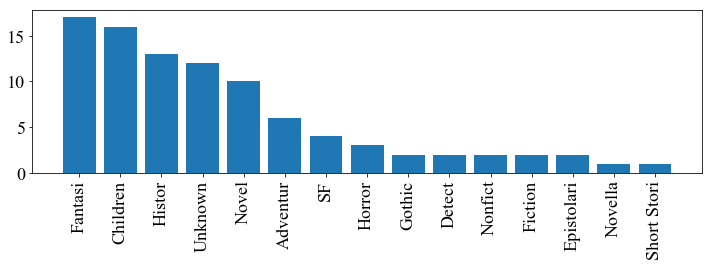

In [77]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = [
    'Times New Roman', 'Tahoma', 'DejaVu Sans', 'Lucida Grande', 'Verdana'
]
# rcParams['font'] = font_path

rcParams['font.size'] = 18

prop = fm.FontProperties(fname=font_path)
# ax.set_title('This is some random font', fontproperties=prop, size=32)

# data = {'apples': 10, 'oranges': 15, 'lemons': 5, 'limes': 20}
# names = list(data.keys())
# values = list(data.values())

fig, axs = plt.subplots(1, 1, figsize=(12, 3))#, figsize=(9, 3), sharey=True)
# axs.bar(names, values)
axs.bar(range(len(data)), list(data.values()), align='center')
plt.xticks(range(len(data)), list(data.keys()))
plt.xticks(rotation=90)
plt.fontproperties = prop
plt.savefig('../plot/correct_labels.png')
# fig.suptitle('Categorical Plotting')